In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [5]:
df = pd.read_csv("hotel_bookings.csv")

In [8]:
df['arrival_date'] = pd.to_datetime(
    df['arrival_date_year'].astype(str) + '-' +
    df['arrival_date_month'] + '-' +
    df['arrival_date_day_of_month'].astype(str)
)

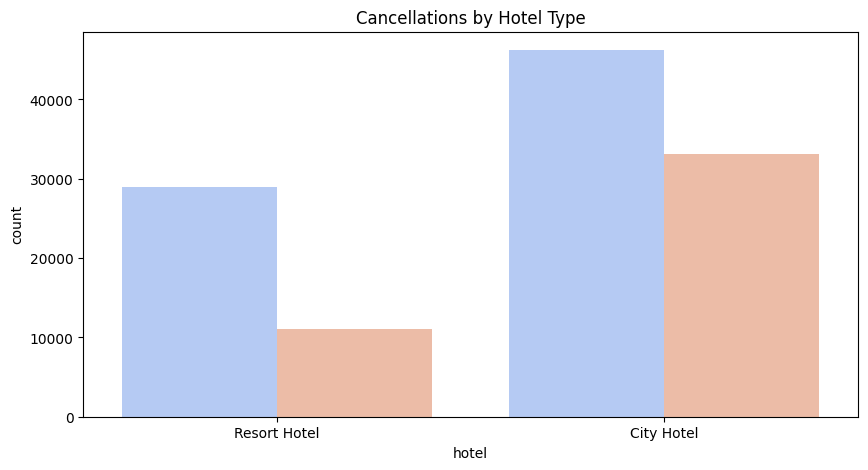

In [18]:
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='hotel', hue='is_canceled', palette='coolwarm', legend=False)
plt.title("Cancellations by Hotel Type")
plt.show()

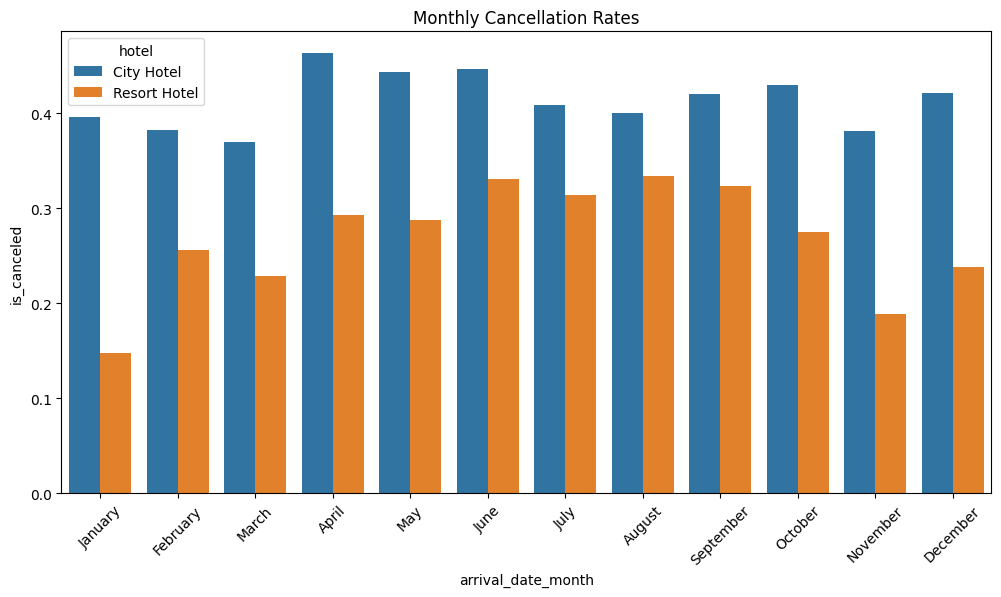

In [10]:
plt.figure(figsize=(12, 6))
monthly_cancel = df.groupby(['arrival_date_month', 'hotel'])['is_canceled'].mean().reset_index()
sns.barplot(data=monthly_cancel, x='arrival_date_month', y='is_canceled', hue='hotel',
            order=['January', 'February', 'March', 'April', 'May', 'June',
                   'July', 'August', 'September', 'October', 'November', 'December'])
plt.title("Monthly Cancellation Rates")
plt.xticks(rotation=45)
plt.show()

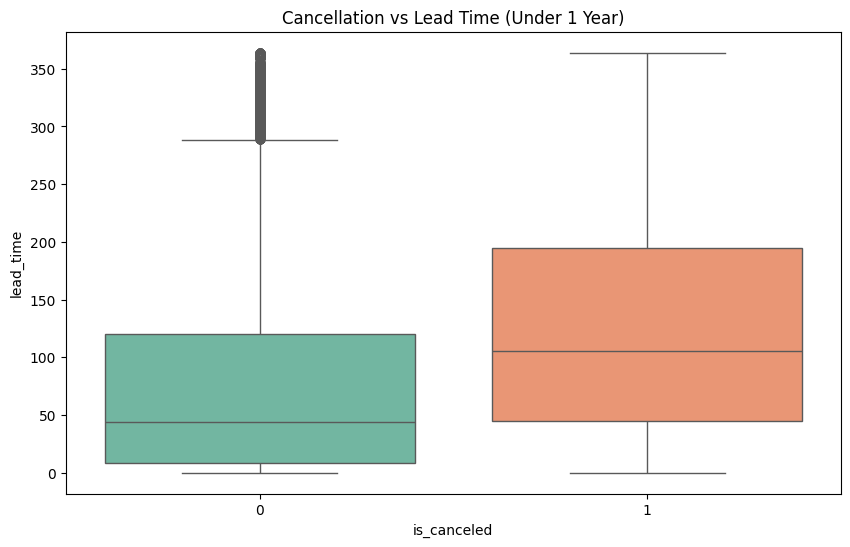

In [19]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[df['lead_time'] < 365], x='is_canceled', y='lead_time',
            hue='is_canceled', palette='Set2', legend=False)
plt.title("Cancellation vs Lead Time (Under 1 Year)")
plt.show()

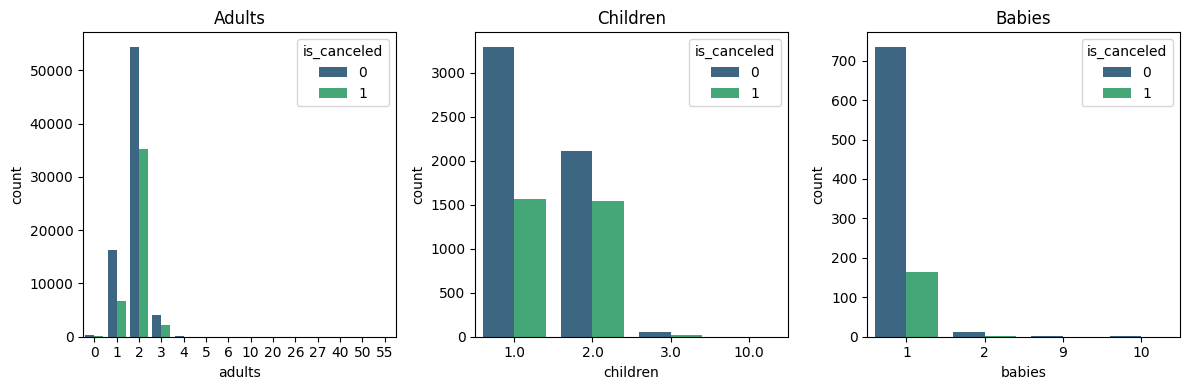

In [12]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.countplot(data=df, x='adults', hue='is_canceled', palette='viridis')
plt.title("Adults")

plt.subplot(1, 3, 2)
sns.countplot(data=df[df['children'] > 0], x='children', hue='is_canceled', palette='viridis')
plt.title("Children")

plt.subplot(1, 3, 3)
sns.countplot(data=df[df['babies'] > 0], x='babies', hue='is_canceled', palette='viridis')
plt.title("Babies")

plt.tight_layout()
plt.show()

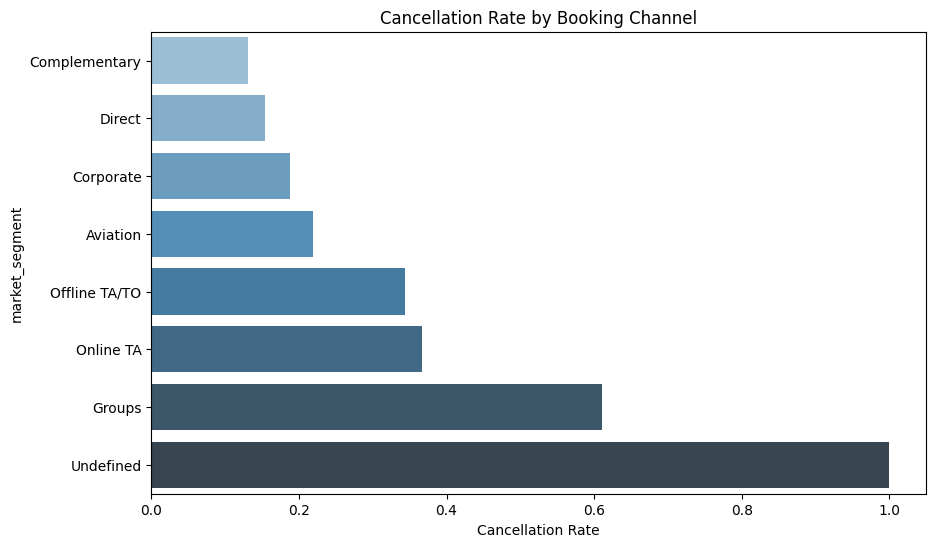

In [28]:
plt.figure(figsize=(10, 6))
channel_cancel = df.groupby('market_segment')['is_canceled'].mean().sort_values()
sns.barplot(x=channel_cancel.values, y=channel_cancel.index, hue=channel_cancel.index, palette='Blues_d' , legend=False)
plt.title("Cancellation Rate by Booking Channel")
plt.xlabel("Cancellation Rate")
plt.show()

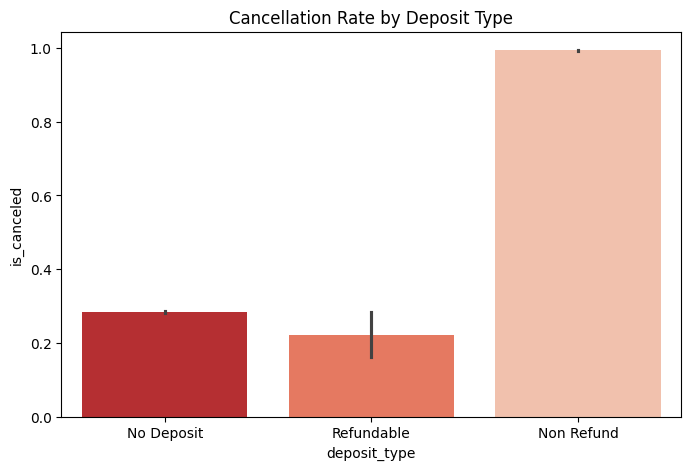

In [22]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='deposit_type', y='is_canceled',
            hue='deposit_type', palette='Reds_r', legend=False,
            order=['No Deposit', 'Refundable', 'Non Refund'])
plt.title("Cancellation Rate by Deposit Type")
plt.show()

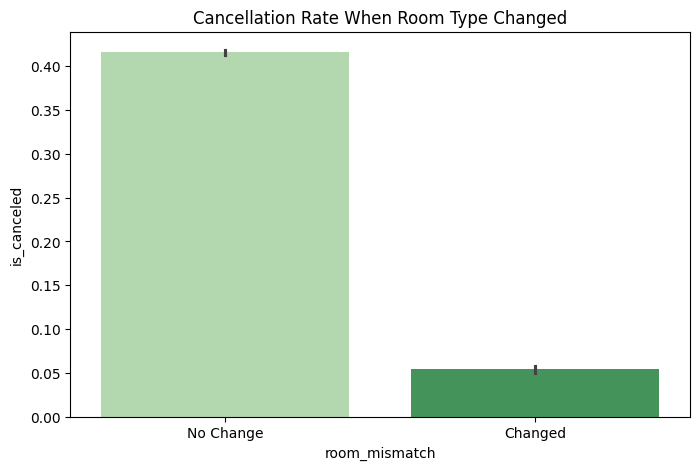

In [23]:
df['room_mismatch'] = (df['reserved_room_type'] != df['assigned_room_type']).astype(int)
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='room_mismatch', y='is_canceled',
            hue='room_mismatch', palette='Greens', legend=False)
plt.title("Cancellation Rate When Room Type Changed")
plt.xticks([0, 1], ['No Change', 'Changed'])
plt.show()

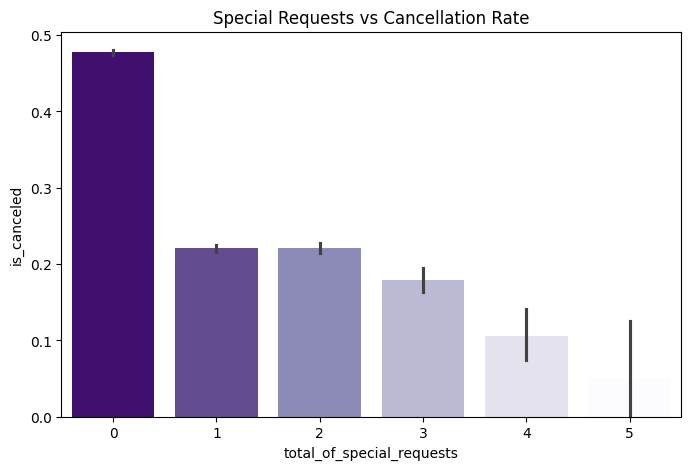

In [24]:
plt.figure(figsize=(8, 5))
sns.barplot(data=df, x='total_of_special_requests', y='is_canceled',
            hue='total_of_special_requests', palette='Purples_r', legend=False)
plt.title("Special Requests vs Cancellation Rate")
plt.show()